In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint, quad
from scipy.optimize import newton

# Question 1

In [2]:
k = np.arange(1, 12 + 1)
m = np.power(2, k)


def f(x):
    return 1 / np.sqrt(x)

In [3]:
a, b = 1, 2


def compute_I(f, a, b, m):
    h_list = (b - a) / m
    I = []
    errors = []
    sol_exact = quad(f, a, b)[0]

    for h in h_list:
        t = np.arange(a, b, h)
        y = np.array(
            [3 / 4 * h * f(t[i] + h / 3) + h / 4 * f(t[i] + h) for i in range(len(t))]
        )
        I_approx = np.sum(y)
        I.append(I_approx)
        errors.append(np.abs(I_approx - sol_exact))

    return I, h_list, errors

I1 = [0.8281067086445473, 0.8283842224576623, 0.8284216302273131, 0.8284264316763478, 0.8284270377897814, 0.8284271138586767, 0.828427123384198, 0.8284271245758775, 0.8284271247248971, 0.8284271247435282, 0.8284271247458573, 0.8284271247461485]


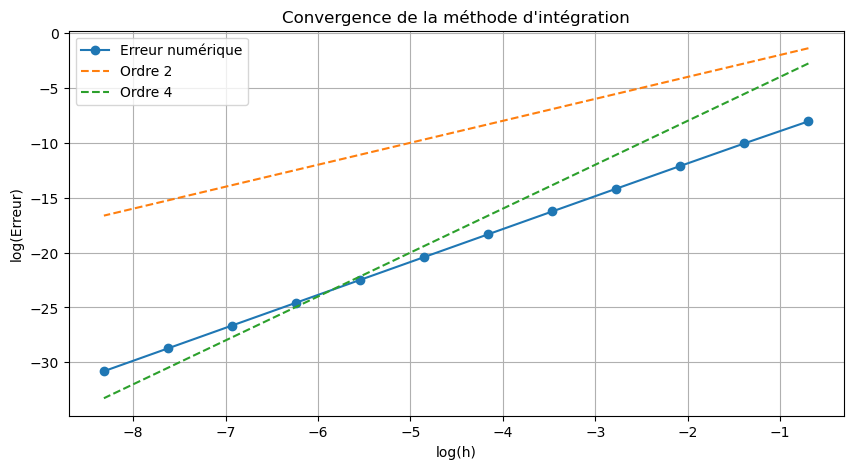

In [4]:
I1, h_list, errors1 = compute_I(f, a, b, m)

print(f"I1 = {I1}")

plt.figure(figsize=(10, 5))
plt.plot(np.log(h_list), np.log(errors1), "o-", label="Erreur numérique")
plt.plot(np.log(h_list), 2 * np.log(h_list), "--", label="Ordre 2")
plt.plot(np.log(h_list), 4 * np.log(h_list), "--", label="Ordre 4")
plt.xlabel("log(h)")
plt.ylabel("log(Erreur)")
plt.title("Convergence de la méthode d'intégration")
plt.legend()
plt.grid(True)
plt.show()

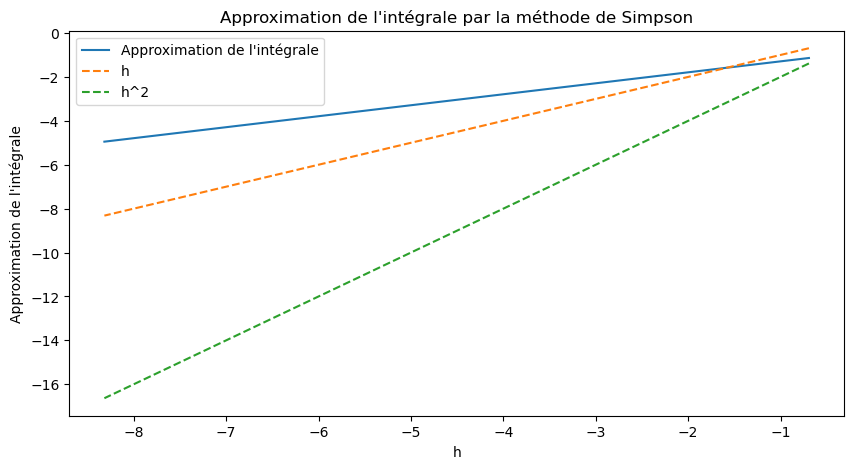

In [5]:
a, b = 0, 1
I2, h_list, errors2 = compute_I(f, a, b, m)

plt.figure(figsize=(10, 5))
plt.plot(np.log(h_list), np.log(errors2), label="Approximation de l'intégrale")
plt.plot(np.log(h_list), np.log(h_list), "--", label="h")
plt.plot(np.log(h_list), 2 * np.log(h_list), "--", label="h^2")
plt.xlabel("h")
plt.ylabel("Approximation de l'intégrale")
plt.title("Approximation de l'intégrale par la méthode de Simpson")
plt.legend()
plt.show()

Dans le premier cas, l'ordre de convergence est **2** alors que dans le second cas, l'ordre de convergence est **1**. Cela est du au fait que lorsque l'on se rapproche trop de 0, donc quand l'intégrale est entre 0 et 1 et que h devient trop petit, les approximations sont trop approximatives

# Question 2

In [6]:
def RKI(f, y0, vt, tol=1e-6, itmax=20):
    N, T = len(vt), vt[-1]
    yn = np.zeros((len(y0), N))
    yn[:, 0] = y0
    h = T / N

    for n in range(N - 1):
        p1 = f(vt[n], yn[:, n])
        def F1(p2):
            return f(vt[n] + h / 3, yn[:, n] + h / 6 * (p1 + p2)) - p2
        p2 = newton(F1, yn[:, n], fprime=None, tol=tol, maxiter=itmax)
        def F2(yn1):
            return yn[:, n] + h / 4 * (3 * p2 + f(vt[n + 1], yn1)) - yn1
        yn[:, n + 1] = newton(F2, yn[:, n], fprime=None, tol=tol, maxiter=itmax)
    return yn

# Question 3

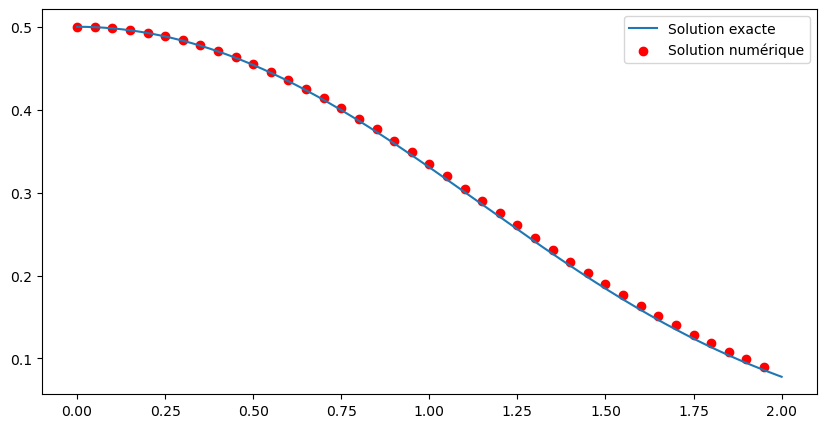

Error with h=0.05: 0.00515308673377779


In [7]:
a, b = [0, 2]


def f(t, y):
    return t * np.power(y, 3) - t * y


y0 = [0.5]


def sol_exact(t):
    return 1 / np.sqrt(1 + 3 * np.exp(np.power(t, 2)))


x_fine = np.linspace(a, b, 1000)
y_fine = sol_exact(x_fine)

h = 0.05
vt = np.arange(a, b, h)
y = RKI(f, y0, vt)

y_exact_interp = np.interp(vt, x_fine, y_fine)

plt.figure(figsize=(10, 5))
plt.plot(x_fine, y_fine, label="Solution exacte")
plt.scatter(vt, y, label="Solution numérique", color="red")
plt.legend()
plt.show()

error = np.max(np.abs(y - y_exact_interp))
print(f"Error with h={h}: {error}")

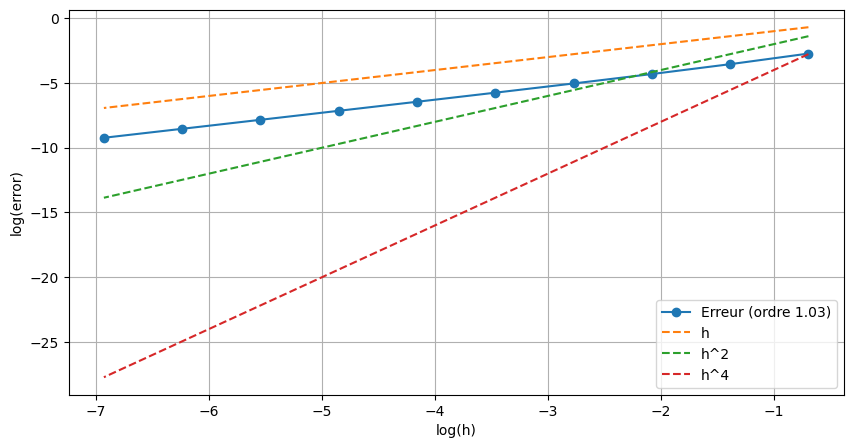

Convergence order: 1.03


In [8]:
k = np.arange(1, 10 + 1)
h_list = 1 / np.power(2, k)

errors = []
for h in h_list:
    vt = np.arange(a, b, h)
    y = RKI(f, y0, vt)
    y_exact = sol_exact(vt)
    errors.append(np.max(np.abs(y - y_exact)))

log_h = np.log(h_list)
log_errors = np.log(errors)
order = np.polyfit(log_h, log_errors, 1)[0]

plt.figure(figsize=(10, 5))
plt.plot(log_h, log_errors, "o-", label=f"Erreur (ordre {order:.2f})")
plt.plot(log_h, log_h, "--", label="h")
plt.plot(log_h, 2 * log_h, "--", label="h^2")
plt.plot(log_h, 4 * log_h, "--", label="h^4")
plt.xlabel("log(h)")
plt.ylabel("log(error)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Convergence order: {order:.2f}")

#### L'ordre de convergence de ce schéma est **1**

# Question 4

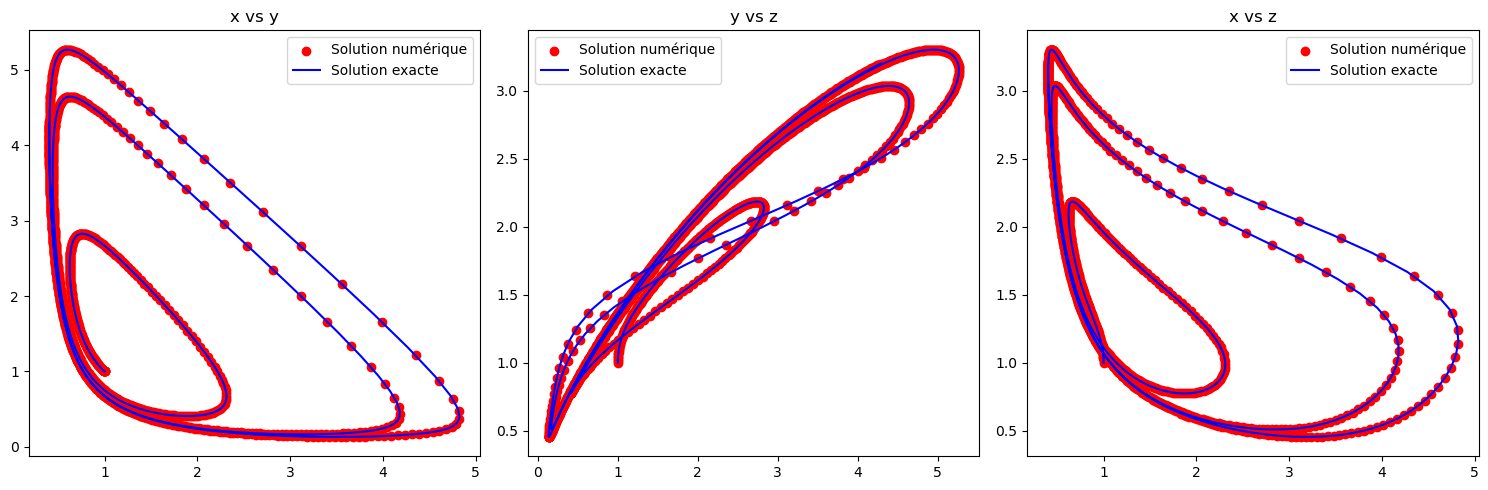

In [9]:
def F(t, Y):
    x, y, z = Y
    return np.array(
        [
            1 + np.power(x, 2) * y - (z + 1) * x,
            x * z - np.power(x, 2) * y,
            -x * z + 1.45,
        ]
    )


h = 0.025
y0 = np.array([1, 1, 1])
t = np.arange(0, 40, h)

sol_exact = odeint(F, y0, t, tfirst=True)
y = RKI(F, y0, t)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(y[0], y[1], label="Solution numérique", color="red")
ax1.plot(sol_exact[:, 0], sol_exact[:, 1], label="Solution exacte", color="blue")
ax1.legend()
ax1.set_title("x vs y")

ax2.scatter(y[1], y[2], label="Solution numérique", color="red")
ax2.plot(sol_exact[:, 1], sol_exact[:, 2], label="Solution exacte", color="blue")
ax2.legend()
ax2.set_title("y vs z")

ax3.scatter(y[0], y[2], label="Solution numérique", color="red")
ax3.plot(sol_exact[:, 0], sol_exact[:, 2], label="Solution exacte", color="blue")
ax3.legend()
ax3.set_title("x vs z")

plt.tight_layout()
plt.show()

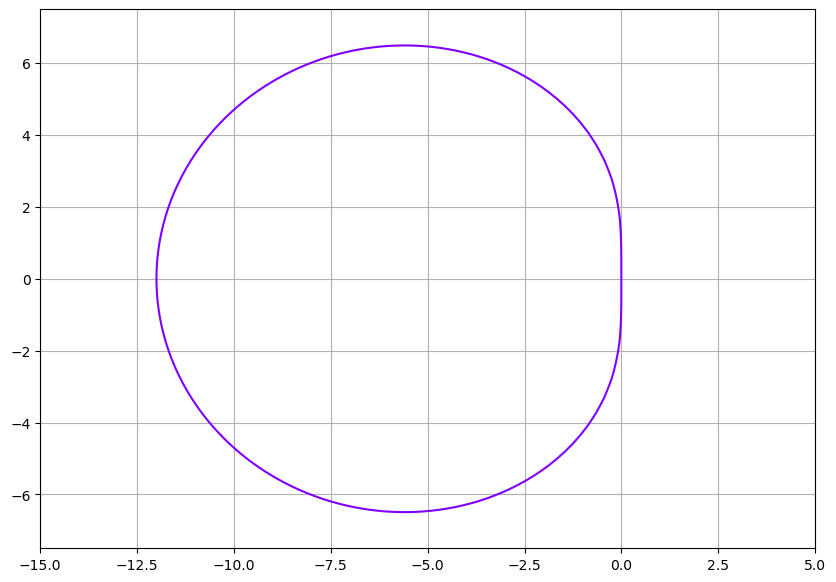

In [10]:
def R(z):
    return (1 + 3 / 4 * z * (1 + z / 6) / (1 - z / 6)) / (1 - z / 4)


x = np.linspace(-15, 5, 100)
y = np.linspace(-7.5, 7.5, 100)
X, Y = np.meshgrid(x, y)
Z = R(X + 1j * Y)
plt.figure(figsize=(10, 7))
plt.contour(X, Y, np.abs(Z), levels=[1], cmap="rainbow")
plt.grid()
plt.show()